In [1]:
# Global.py

# Global variables.

# Information display variables.

class Global:
    
    _debug = False
    _info  = False
    
    # Environment variables.
    
    _manual_drive = True
    
    
    # Plan variables.
    
    _quit     = "QUIT"
    _rebuild  = "rebuild"
    _rehost   = "rehost"
    _replace  = "replace"
    _refactor = "refactor"
    _retire   = "retire"
    _sustain  = "sustain"
    _graph    = "graph"
    
    _plan_list = [ _rebuild, _rehost, _replace, _refactor, _retire, _sustain, _quit ]
    
    # Boolean Expression Parser variables.
    
    _left_square_bracket = "["
    _right_square_bracket = "]"
    _condition_EOL = ";"
    _and = "AND"
    _or = "OR"
 
    # Pointers to data that can be used outside the Agent.
    
    _planner_knowledge_graph = None
    _data_list = []
    _rules = []

#Rehost. Often referred to as lift and shift, this strategy is a cost-effective way to take advantage of a modern cloud infrastructure without modifying an application’s code.
#Replatform. Sometimes called lift, tinker, and shift, this strategy goes beyond rehosting, moving the application to a new runtime platform with minimal code changes.
#Refactor. This strategy involves changes to existing code without major changes to an application’s external behavior.
    # -> Low technical, high business, low app cost, low risk, low modernization
#Rebuild. Starting over is the right strategy when the cost of replatforming or refactoring outweighs the benefits. Rebuilding may be the only way to address legacy issues and incorporate new functionalities.
    # -> Low technical, high business, high app cost, high risk, low modernization
#Retire. This strategy means decommissioning or shutting down applications.
    # -> shortest path
#Retain. This strategy applies when your organization isn’t ready to modernize an application because of cost, dependencies, risks, or other factors.
    # -> high technical, low business, low app cost, low risk, low modernization
#Ideal
    # -> longest path
    # -> high technical, high business, low app cost, low risk, high modernization


In [2]:
# PlannerKnowledgeGraphC

# Import Project classes.

#import Global

# Import libraries.

import networkx as nx
import nx_altair as nxa
        

class PlannerKnowledgeGraphC:

    # Constructor

    def __init__(self):

        self.G = nx.DiGraph()

        # Add the Start node to the graph.
        
        self.add_node("Start", "Start", "application", "n/a")

    
    # get_graph
    
    def get_graph(self):
        return self.G

        
    # add_node

    def add_node(self, node_id, node_name, attribute_name, attribute_value):

        try:

            attribute_list = [] 
        
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_list  = ", attribute_list)
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_name  = ", attribute_name)
            if Global._debug: print ("PlannerKnowledgeGraphC add_node attribute_value = ", attribute_value)

            # Check to see if a node with this node_id already exists in the graph.

            if (self.G.has_node(node_id)):

                # This node already exists.  Therefore, get the node's attribute specified
                # by the attribute name.

                attribute_list = list(self.G.nodes[node_id][attribute_name])
                if Global._debug: print ("Node", node_id, " ", attribute_name, "is:", attribute_list)
        
            # Append the new attribute value to the attribute list.

            attribute_list.append(attribute_value)

            # Add the node and its attribute list.

            self.G.add_node(node_id, node=node_id, name=node_name)
            self.G.nodes[node_id][attribute_name] = attribute_list
            self.G.nodes[node_id]["description"] = attribute_list
            self.G.nodes[node_id][attribute_name+"_count"] = len(attribute_list)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e


    # add_edge

    def add_edge(self, current_node, dest_node, weight):
        
        # Add an edge between the source node and destination node.
        # Add the weight.


        self.G.add_edge(current_node, dest_node, weight=int(weight))

    
    # add_end_node
    
    def add_end_node(self):

        try:

            # Add the end node to the graph.
            
            self.add_node("End", "End", "application", "n/a")

            # Get all of the leaf nodes in the graph.

            leaf_nodes = [node for node in self.G.nodes() if self.G.out_degree(node) == 0]

            # Iterate through the leaf nodes and add an edge to the End node.  Add a default
            # weighting.

            for leaf_node in leaf_nodes:
            
                self.add_edge(leaf_node, "End", 1)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerKnowledgeGraphC Exception:", e)
            raise e

    
    # get_node_applications

    def get_node_applications(self, node_id, attribute_name):

        # Return the nodes.

        return self.G.nodes[node_id][attribute_name]

        # Print out the node's attribute values give the node ID and attribute name.

      #  print ("Node ", node_id, "is named", self.G.nodes[node_id]["name"], "and contains attributes:", self.G.nodes[node_id][attribute_name])


    # print_node_applications

    def print_node_applications(self, node_id, attribute_name):

        # Print out the node's attribute values give the node ID and attribute name.

        print ("Node ", node_id, "is named", self.G.nodes[node_id]["name"], "and contains attributes:", self.G.nodes[node_id][attribute_name])


    def print_leaf_nodes(self, attribute_name):

        leaf_nodes = [node for node in self.G.nodes() if self.G.out_degree(node) == 0]

        print ("leaf nodes:", leaf_nodes)

        for leaf_node in leaf_nodes:
            self.print_node_applications(leaf_node, attribute_name)


    def get_shortest_path_nodes(self) -> []:

        source_node = "Start"
        dest_node = "End"

        return nx.astar_path(self.G, source_node, dest_node, heuristic=None, weight='manhattan_distance')


    def print_shortest_path(self):

        source_node = "Start"
        dest_node = "End"

        if Global._debug: print ("\nShortest Dijkstra path:", nx.shortest_path(self.G, source_node, dest_node, weight=None, method='dijkstra'))
        if Global._debug: print ("\nShortest A* path:", nx.astar_path(self.G, source_node, dest_node, heuristic=None, weight='manhattan_distance'))
        if Global._debug: print ("\nShortest path by weight:", nx.shortest_path(self.G, source_node, dest_node, weight='weight'))
        if Global._debug: print ("\nShortest path length:", nx.shortest_path_length(self.G, source_node, dest_node, weight='weight'))

    
   # get_longest_path_nodes

    def get_longest_path_nodes(self) -> []:

        # Define the source and destination nodes.

        source_node = "Start"
        dest_node = "End"

        # Initialize the high watermark weight and longest path.

        high_watermark_weight = 0
        longest_path = []

        if Global._debug: print ("Is the graph cyclic?", nx.is_directed_acyclic_graph(self.G))

        # Identify all paths in the graph from the source node to the destination node.

        all_paths = list(nx.all_simple_paths(self.G, source_node, dest_node))
        if Global._debug: print ("All paths in the graph from", source_node, "to", dest_node, ":", all_paths)

        # Iterate through all the paths in the graph to determine which one is the longest one by weight.

        for path in all_paths:

            if Global._debug: print ("Evaluating path:", path)

            path_weight = 0

            # Iterate over all the nodes in the path.

            for i in range (len(path) - 1):

                # Determine if an edge exists (it should!) between the current node and the next node in the
                # path.

                if (self.G.has_edge(path[i], path[i+1])):

                    # An edge exists, therefore add its weight to the path's weight.

                    path_weight = path_weight + self.G[path[i]][path[i+1]]["weight"]

            if Global._debug: print ("Path weight: ", path_weight)

            # If the path's weight is larger than the high watermark, this path is now the
            # longest path.

            if (path_weight > high_watermark_weight):

                # Set this path to be the longest path.

                high_watermark_weight = path_weight
                longest_path = path

                if Global._debug: print ("This path is now the longest path")

        if Global._debug: print ("Longest path in the graph (weight = ", high_watermark_weight, "):", longest_path)
        
        return longest_path


    # print_longest_path(self):

    def print_longest_path(self):

        if Global._debug: print ("Longest path in the graph:", self.get_longest_path_nodes())
            

    def print(self):

        print("!!!! NODES:", self.G.nodes)
        print("!!!! EDGES:", self.G.edges)

        self.display_graph()


    def breadth_first_search(self, source_node):
        
        graph_edges = list(nx.bfs_edges(self.G, source_node))

        if Global._debug: print ("BFS Edges:", graph_edges)

        return graph_edges


    def search_graph_by_name(self, node_name):

        for node_id, attributes in self.G.nodes(data=True):
            
            if (attributes.get('name') == node_name):

                print ("Node_id", node_id, "is named", node_name, "and contains apps", attributes['application'])


    def search_graph_by_names(self, node_name1, node_name2):

        matched_nodes_list = []
        both_matched_nodes_list = []
        # Get the list of bread_first_search edges.

        graph_edges = self.breadth_first_search('Start')

        for u, v in graph_edges:

            print ("v = ", v)
            if (self.G.nodes[v].get("name") == node_name1):

                matched_nodes_list.append(v)

        print ("Matched_nodes_list = ", matched_nodes_list)
            
        for matched_node in matched_nodes_list:

            matched_graph_edges = self.breadth_first_search(matched_node)

            for u, v in matched_graph_edges:

                print ("v = ", v)
                if (self.G.nodes[v].get("name") == node_name2):

                    both_matched_nodes_list.append(v)


        print ("Both Matched_nodes_list = ", both_matched_nodes_list)

        print ("The applications that")


#    node_list = [ 'Low_business_value', 'High_technical_condition', 'Low_application_risk']
#    matched_nodes_list = []


    # search_graph_by_multi_names

    def search_graph_by_multi_names(self, name_list, matched_nodes_list) -> []:

        if Global._debug: print ("Recursive search graph name_list", name_list)
        if Global._debug: print ("Recursive search graph matched_nodes_list", matched_nodes_list)

        # Check if there are still node names to be searched.
        if (len(name_list) > 0):

            # There is, get the last one in the list.

            node_to_match = name_list.pop()
            if Global._debug: print ("Recursive search graph matched_nodes_list node_to_match", node_to_match)

        else:

            # No more names to search, unwind the recursive calls by returning the matched_nodes_list.

            return matched_nodes_list

        # Do a breadth first search to get the list of nodes that match the node to match as
        # especially in the lower layers there can be multiple nodes.
        # (e.g., High_modernization)

        graph_edges = self.breadth_first_search('Start')

        matched_names_list = []

        # Iterate over the edges in the graph (u, v).

        for u, v in graph_edges:

            if Global._debug: print ("v = ", v)

            if (self.G.nodes[v].get("name") == node_to_match):

           #     if (v not in matched_nodes_list):
                matched_names_list.append(v)

        # matched_nodes_list = ['1', '1.2']

        if Global._debug: print ("Recursive search graph List of nodes that match", node_to_match, "are", matched_names_list)

        # If there are no matched names then the matched names list will be empty as the
        # matched names is a logical AND.

        if (len(matched_names_list) == 0):
        
            name_list.clear()

            return []

        # Iterate through the list of matched nodes to see if there is a path between it and
        # the current set.

        new_matched_nodes_list = []

        if (len(matched_nodes_list) == 0):

            new_matched_nodes_list = matched_names_list

        else:

            # Iterate through the matched names and matched nodes list to determine if there
            # is a path between the two nodes.  Account for direction (e.g., node 2.1.1 is further down
            # the tree than node 2.1).  Using a transitive relation: if there exists a path between
            # A -> B and there is a path between B -> C, then there is a path between A -> B -> C

            for source_node in matched_names_list:

                for target_node in matched_nodes_list:

                    if (source_node != target_node):

                        if (len(source_node) < len(target_node)):

                            path_exists = nx.has_path(self.G, source=source_node, target=target_node)
                            if Global._debug: print (f"Path exists between {source_node} and {target_node}: {path_exists}")
                            
                            if (path_exists):

                                new_matched_nodes_list.append(target_node)

                        else:

                            path_exists = nx.has_path(self.G, source=target_node, target=source_node)
                            if Global._debug: print (f"Path exists between {target_node} and {source_node}: {path_exists}")

                            if (path_exists):

                                new_matched_nodes_list.append(source_node)

        matched_nodes_list = new_matched_nodes_list


        if Global._debug: print ("Recursive search graph END matched_nodes_list", matched_nodes_list)

        return self.search_graph_by_multi_names(name_list, matched_nodes_list)


    def display_graph(self):

        # Generate a random graph
       # G = nx.fast_gnp_random_graph(n=20, p=0.25)
        
        # Compute positions for viz.
        pos = nx.spring_layout(self.G)
        
        # Draw the graph using Altair
        viz = nxa.draw_networkx(self.G, pos=pos)
        
        # Show it as an interactive plot!
        viz.interactive()


In [3]:
# PlannerActionConstructA

# Import libraries.

from abc import ABC, abstractmethod

class PlannerActionConstructA(ABC):

    # Constructor

    def __init__(self):
        pass


    # invokeAction

    def invokeAction(self, dataDictionary, actionHash, plannerKnowledgeGraph) -> {}:
       
        print ("PlannerboxActionConstructA is abstract.")




In [4]:
# PlannerAddNodeActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#import Global

# Import libraries.

from abc import ABC, abstractmethod


class PlannerGraphActionConstructA(PlannerActionConstructA, ABC):
   
    def __init__(self):
        pass


    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        print ("ABATRACT CLSSS")

        return None



In [5]:
# PlannerAddActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA

# Import libraries.

#import Global


class PlannerAddActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()

    
    # invoke Action

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:
            if Global._debug: print ("Add Action actionData:", actionData)
            if Global._debug: print ("Add Action dataDictionary:", dataDictionary)

            # "ADD <value> to <dictionary_variable>"

            value               = actionData[1] #.upper()  # .strip()
            dictionary_variable = actionData[3].upper()  #.delete('()').strip

            if Global._debug: print ("Add Action:", value, "will be added to", dictionary_variable)

            dictionary_variable_value = int(dataDictionary[dictionary_variable]) + int(value)

            # Uupdate the data dictionary with the new value..

            dataDictionary.update({dictionary_variable : str(dictionary_variable_value)})

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddActionConstructC Exception:", e)
            raise e


In [6]:
# PlannerAddNodeActionConstructC

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA
#import Global



class PlannerAddEdgeActionConstructC(PlannerGraphActionConstructA):
   
    def __init__(self):
        super().__init__()


    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Add_Edge Action actionData:", actionData)
            if Global._debug: print ("Add_Edge Action dataDictionary:", dataDictionary)

            # Add dest to current weighted weight

            dest_node     = actionData[1] #.upper()  # .strip()
            current_node  = actionData[3]  #.delete('()').strip
            weight        = actionData[5]  #.delete('()').strip

            # TO_DO: if actionData[2] != 'to' or actionData[4] != 'weighted' then: Usage: ADD_EDGE <dest> to <current> weighted <weight>

            if Global._debug: print ("Add_Edge Action: an edge from", current_node, "to", dest_node, "weighted", weight, "will be created.")

            # Add the graph edge to the Planner Knowledge Graph.

            plannerKnowledgeGraph.add_edge(current_node, dest_node, weight)
      
            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddEdgeActionConstructC Exception:", e)
            raise e



In [7]:
# PlannerAddNodeActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA

# Import libraries.

#import Global


class PlannerAddNodeActionConstructC(PlannerGraphActionConstructA):
   
    def __init__(self):
        super().__init__()


    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Add_Npde Action actionData:", actionData)
            if Global._debug: print ("Add_Node Action dataDictionary:", dataDictionary)

            # "ADD_NODE <attribute_name> <attribute_value> to <node_id> named <node_name>"

            attribute_name  = actionData[1] #.upper()  # .strip()
            attribute_value = actionData[2] #.upper()  # .strip()
            node_id         = actionData[4]  #.delete('()').strip
            node_name       = actionData[6]  #.delete('()').strip

            if Global._debug: print ("Add_Node Action: a node with", attribute_name, " ", attribute_value, "will be added to", node_id, "named", node_name)

            # Add the graph node to the Planner Knowledge Graph.

            plannerKnowledgeGraph.add_node(node_id, node_name, attribute_name, attribute_value)
            plannerKnowledgeGraph.display_graph()

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddNodeActionConstructC Exception:", e)
            raise e


In [8]:
# PlannerSetActionConstructC

#from PlannerActionConstructA import PlannerActionConstructA
#import Global

class PlannerSetActionConstructC(PlannerActionConstructA):
   
    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Set Action actionData:", actionData)
            if Global._debug: print ("Set Action dataDictionary:", dataDictionary)

            myKey   = actionData[1].upper()  # .strip()
            myValue = actionData[3]  #.delete('()').strip

            if Global._debug: print ("Set Action:", myKey, "will be set to", myValue)

            dataDictionary[myKey] = myValue

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerSetActionConstructC Exception:", e)
            raise e


In [9]:
# PlannerSubtractActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA

#import Global


class PlannerSubtractActionConstructC(PlannerGraphActionConstructA):

    # Constructor
       
    def __init__(self):
        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            # "SUBTRACT <value> from <dictionary_variable>"

            if Global._debug: print ("Subtract Action actionData:", actionData)
            if Global._debug: print ("Subtract Action dataDictionary:", dataDictionary)

            # Extract the value and the data dictionary variable.

            value               = actionData[1] #.upper()  # .strip()
            dictionary_variable = actionData[3].upper()  #.delete('()').strip

            # Subtract the value from the dictionary variable.

            if Global._debug: print ("Subtract Action:", value, "will be subtracted from", dictionary_variable)

            dictionary_variable_value = int(dataDictionary[dictionary_variable]) - int(value)

            # Uupdate the data dictionary with the new value..

            dataDictionary.update({dictionary_variable : str(dictionary_variable_value)})

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerSubtractActionConstructC Exception:", e)
            raise e






In [10]:
# PlannerDisplayMessageActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA

# Import libraries.

#import Global


class PlannerDisplayMessageActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):
        super().__init__()

    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Display_Message Action actionData:", actionData)
            if Global._debug: print ("Display_Message Action dataDictionary:", dataDictionary)

            # "Display_Message <message>"

            message  = " ".join(actionData[1:])

            # Add the graph node to the Planner Knowledge Graph.

            print ("\n", message, "\n")

            plannerKnowledgeGraph.display_graph()
            
            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerAddNodeActionConstructC Exception:", e)
            raise e


In [11]:
# PlannerDisplayNodeActionConstructC

# Import Project classes.

#from PlannerActionConstructA import PlannerActionConstructA
#from PlannerGraphActionConstructA import PlannerGraphActionConstructA
#import Global


# Import libraries.

import re


class PlannerDisplayNodeActionConstructC(PlannerGraphActionConstructA):
   
    # Constructor

    def __init__(self):

        super().__init__()


    # invokeAction

    def invokeAction(self, dataDictionary, actionData, plannerKnowledgeGraph) -> {}:

        try:
            if Global._debug: print ("Display_Node Action actionData:", actionData)
            if Global._debug: print ("Display_Node Action dataDictionary:", dataDictionary)

            # "DISPLAY_PLAN application on node low_business_value+high_technical_condition+high_application_cost"
            # "DISPLAY_PLAN application on node shortest_path"

            plan_name        = actionData[1] #.upper()  # .strip()
            attribute_name   = actionData[2] #.upper()  # .strip()
            node_name        = actionData[5]  #.delete('()').strip

            if Global._debug: print ("Display_Node Action:", attribute_name, " on Node named", node_name)

            if Global._debug: plannerKnowledgeGraph.print()

            # Determine which information to display.

            if (node_name == 'shortest_path'):

                self.display_shortest_path(plannerKnowledgeGraph)

            elif (node_name == 'longest_path'):

                self.display_longest_path(plannerKnowledgeGraph)

            else:

                self.display_node_via_search(plan_name, node_name, plannerKnowledgeGraph)

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerDisplayNodeActionConstructC Exception:", e)
            raise e


    # display_shortest_path

    def display_shortest_path(self, plannerKnowledgeGraph):

        # Retrieve the shortest path nodes from the graph.

        shortest_path_nodes = plannerKnowledgeGraph.get_shortest_path_nodes()

        # Display the shortest path.

        if Global._debug: print ("Shortest path through the graph:", shortest_path_nodes)

        # Pop the shortest path nodes to remove the End node.

        shortest_path_nodes.pop()

        # Get the last leaf node which will contain all the entities that made it to the last node.

        last_leaf_node = shortest_path_nodes.pop()

        entities = plannerKnowledgeGraph.get_node_applications(last_leaf_node, "application")

        print ("Entities:", entities)



    # display_longest_path

    def display_longest_path(self, plannerKnowledgeGraph):

        # Retrieve the shortest path nodes from the graph.

        longest_path_nodes = plannerKnowledgeGraph.get_longest_path_nodes()

        # Display the longest path.

        if Global._debug: print ("Longest path through the graph:", longest_path_nodes)

        # Pop the shortest path nodes to remove the End node.

        longest_path_nodes.pop()

        # Get the last leaf node which will contain all the entities that made it to the last node.

        last_leaf_node = longest_path_nodes.pop()

        entities = plannerKnowledgeGraph.get_node_applications(last_leaf_node, "application")

        print ("Entities:", entities)


    # display_node_via_search

    def display_node_via_search(self, plan_name, search_criteria, plannerKnowledgeGraph) -> {}:

        try:

            matched_nodes_list = []
            search_criteria_tokens =  re.split(r"\+", search_criteria)

            if Global._debug: print ("Search criteria", search_criteria)
            if Global._debug: print ("Search criteria tokens", search_criteria_tokens)

            final_nodes_list = plannerKnowledgeGraph.search_graph_by_multi_names(search_criteria_tokens, matched_nodes_list)

            if Global._debug: print ("Final nodes list = ", final_nodes_list)
            if Global._debug: print ("Final nodes list sorted = ", sorted(final_nodes_list))

            final_application_list = []

            for final_node in final_nodes_list:
                plannerKnowledgeGraph.print_node_applications(final_node, "application")
                applications = plannerKnowledgeGraph.get_node_applications(final_node, "application")

                final_application_list.append(applications)

            if Global._debug: print ("PLAN:", plan_name)
            if Global._debug: print ("------------------")
            if Global._debug: print ("The final application list for plan,", plan_name, "is:\n\n", final_application_list)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerDisplayNodeActionConstructC Exception:", e)
            raise e
        

        

        #planner_knowledge_graph.print_node_applications("1.1.1.1", "application")
        #planner_knowledge_graph.print_leaf_nodes("application")
        #planner_knowledge_graph.add_end_node()
        
        #planner_knowledge_graph.print()

        #print("If you know the name of the node, you can iterate through all the nodes and get the name:")
        #planner_knowledge_graph.search_graph_by_name("Low_business_value")
        #planner_knowledge_graph.search_graph_by_name("Low_technical_condition")

        #print("If you want to know which nodes have Low_business_value, Low_technical_condition, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('Low_business_value', 'Low_technical_condition')

        #print("If you want to get all the edges in a breadth first search:")
        #planner_knowledge_graph.breadth_first_search('Start')

        #print("Applications that should be Tolerated")
        #print("-------------------------------------")
        #print("The following applications have a low business value and a high technical condition, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('Low_business_value', 'Low_technical_condition')
        
        #print("If you want to know which nodes have high application risk, low modernization, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('High_application_risk', 'Low_modernization')

        #planner_knowledge_graph.print_node_applications("1", "application")
        #planner_knowledge_graph.print_node_applications("2", "application")


        # Application Rationalization Plan
        #----------------------------------
        # 1. Focus on the applications as they have scored the lowest:
        #
        #       - App1
        #       - App2

        # 2. These applications can be easily decommissioned as they have low business and technical value:

        # 3. These applications will save you the most money as they have high application cost and low business value

        # 4. These applications may be quite risky to remove as they have a high application risk.

        # 5.  These applications scored the best so they can be prioritized at the bottom of the list.

        #  Here are some charts:

        #  Here is the graph that was built to explore



In [12]:
# PlannerActionEvaluatorConstructC
#
# Class that evaluates the rule actions.

# Import libraries.

#from PlannerAddActionConstructC import PlannerAddActionConstructC
#from PlannerAddNodeActionConstructC import PlannerAddNodeActionConstructC
#from PlannerAddEdgeActionConstructC import PlannerAddEdgeActionConstructC
#from PlannerSetActionConstructC import PlannerSetActionConstructC
#from PlannerSubtractActionConstructC import PlannerSubtractActionConstructC
#from PlannerDisplayNodeActionConstructC import PlannerDisplayNodeActionConstructC
#from PlannerDisplayMessageActionConstructC import PlannerDisplayMessageActionConstructC

#import Global


# Class PlanterboxActionEvaluatorConstructC

class PlannerActionEvaluatorConstructC:

    # Constructor

    def __init__(self):

        # Create a Hashtable of the set of allowable condition constructs.

        self.actionConstructLibrary = {}
        self.actionConstructLibrary["ADD"]             = PlannerAddActionConstructC()
        self.actionConstructLibrary["ADD_NODE"]        = PlannerAddNodeActionConstructC()
        self.actionConstructLibrary["ADD_EDGE"]        = PlannerAddEdgeActionConstructC()
        self.actionConstructLibrary["SET"]             = PlannerSetActionConstructC()
        self.actionConstructLibrary["SUBTRACT"]        = PlannerSubtractActionConstructC()
        self.actionConstructLibrary["DISPLAY_NODE"]    = PlannerDisplayNodeActionConstructC()
        self.actionConstructLibrary["DISPLAY_MESSAGE"]    = PlannerDisplayMessageActionConstructC()
        

    # invokeAction
    #
    # [in]: rule - the rule action to take once the condition constructs evaluate to True
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def invokeAction(self, action, dataDictionary, plannerKnowledgeGraph) -> {}:

        try:

            if Global._debug: print ("Invoking the rule action:", action)

            # Split the action constructs by the space character.

            constructComponents = action.split(" ")

            # Remove the action's brackets.  The actionData consists of all the 
            # other components of the action that will be left up to the individual
            # action to interpret.

            actionComponent = constructComponents[0].upper() #.delete('()').strip
            actionData      = constructComponents

            if Global._debug: print("actionComponent =", actionComponent)

            # Invoke the action.

            dataDictionary = self.actionConstructLibrary[actionComponent].invokeAction(dataDictionary, actionData, plannerKnowledgeGraph)

            return dataDictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerActionEvaluatorConstructC Exception:", e)
            raise e


In [13]:
# PlannerConditionConstructA

# Import libraries.

from abc import ABC, abstractmethod


class PlannerConditionConstructA(ABC):

    # Constructor

    def __init__(self):
        pass


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:
        
        # Raise an exception if the abstract class is called.

        raise Exception("PlannerConditionConstructA is abstract.")








In [14]:
# PlannerIsConditionConstructC

# Import libraries.

#from PlannerConditionConstructA import PlannerConditionConstructA

#import Global

class PlannerIsConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass
        #super.__init()


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Condition: testing if", myKey, "=", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)

                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    # Check if the value is 'empty'.

                    if (myValue == 'empty'):

                        return True

                    else:

                        return False

                else:

                    # Determine if the variable's value in the data dictionary is the value
                    # specified in the condition.

                    if (dataDictionaryValue == myValue):

                        if Global._debug: print ("True:", dataDictionaryValue, "=", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):
                        
                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.
            
            if Global._debug: print ("False:", myKey, "!=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsConditionConstructC Exception:", e)
            raise e


In [15]:
# PlannerIsGreaterThanConditionConstructC

# Import libraries.

#from PlannerConditionConstructA import PlannerConditionConstructA

#import Global

class PlannerIsGreaterThanConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass
        #super.__init()


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Greater THan Condition: testing if", myKey, ">", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)
                
                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    if (myValue == 'empty'):

                        return True
                    
                    else:
                        
                        return False

                else:

                    # Determine if the variable's value in the data dictionary is greater than the value
                    # specified in the condition.

                    if (int(dataDictionaryValue) > int(myValue)):

                        if Global._debug: print ("True:", dataDictionaryValue, ">", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):
                        
                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.

            if Global._debug: print ("False:", myKey, "<=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsGreaterThanConditionConstructC Exception:", e)
            raise e


In [16]:
# PlannerIsLessThanConditionConstructC

# Import libraries.

#from PlannerConditionConstructA import PlannerConditionConstructA

#import Global

class PlannerIsLessThanConditionConstructC(PlannerConditionConstructA):

    # Constructor.

    def __init__(self):

        pass
        #super.__init()


    # evaluate

    def evaluate(self, dataDictionary, conditionHash) -> bool:

        try:

            # Get the keyword-value from the condition Hash.

            myKey   = conditionHash["keyword"].upper()   # uppper case it
            myValue = conditionHash["value"]

            if Global._debug: print ("Is Less Than Condition: testing if", myKey, "<", myValue)
            if Global._debug: print ("DataDictionary = ", dataDictionary)

            # Verify that the dictionary key exists so a key error does not occur.

            if (myKey in dataDictionary):
        
                dataDictionaryValue = dataDictionary[myKey]
                if Global._debug: print("Value for", myKey, "in the data dictionary is:", dataDictionaryValue)
                
                # Determine if there is a value for this key.

                if (dataDictionaryValue == None):
            
                    if (myValue == 'empty'):

                        return True

                    else:

                        return False

                else:

                    # Determine if the variable's value in the data dictionary is less than the value
                    # specified in the condition.

                    if (int(dataDictionaryValue) < int(myValue)):

                        if Global._debug: print ("True:", dataDictionaryValue, "<", myValue)
                        
                        return True
                    
                    elif (myValue == 'empty') and (dataDictionaryValue == ""):

                        if Global._debug: print ("False:", dataDictionaryValue, "=", myValue, "(empty)")
                        
                        return False

            # If this point is reached, the condition is False.

            if Global._debug: print ("False:", myKey, ">=", myValue)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerIsLessThanConditionConstructC Exception:", e)
            raise e


In [17]:
# BooleanExpressionEvaluatorA.rb
#
# Abstract class for evaluating boolean expressions.

# Import libraries.

from abc import ABC, abstractmethod
import re

# Import Project classes.

#import Global


# Class: BooleanExpressionEvaluatorA

class BooleanExpressionEvaluatorA(ABC):

    # Define attributes.

  #  attr_accessor  :booleanExpression, :dataDictionary, :postToken, :leftOperand, :currentTokenIndex

    # Constructor
    #
    # [in]: booleanExpression - the boolean expression to evaluate
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def __init__(self, booleanExpression, dataDictionary):
    
        try:

            self.booleanExpression = []

            if Global._debug: print ("boolean expression: ", booleanExpression)

            # Split the boolean expression based the language constructs.

            self.tempExpression = re.split(r"([\!\[\]\(\)])", booleanExpression)

            #self.tempExpression = booleanExpression.split(/(?<=[\!\[\]\)])/).map(&:strip)

            if Global._debug: print ("Parsed boolean expression", self.tempExpression)

            # Iterate over the tokens in the expression and only keep the ones that are necessary.
            # In other words, no empty strings or the brackets '()'.

            for token in self.tempExpression:

                token = token.strip()
           
                if (len(token) == 0):
                    continue

                if (token in '()'):
                    continue

                self.booleanExpression.append(token)

            if Global._debug: print ("Parsed boolean expression", self.booleanExpression)

            self.dataDictionary = dataDictionary
            self.postToken = ""
            self.leftOperand = ""
            self.currentTokenIndex = -1

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e

    
    # evaluateBooleanExpression

    def evaluateBooleanExpression(self):

        try:

            leftBoolResult = False

            leftBoolResult = self.evaluateOrExpression()

            # Determine if the end of line character has been reached.

            if (self.postToken == ";"):

                # It has, therefore return the result of the boolean expression.

                return leftBoolResult

            else:

                # Otherwise, the end of line expression is missing.

                raise Exception("ERROR: missing end of boolean expression token - ; in", self.booleanExpression)

            return False

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exceptijjon:", e)
            raise e


    # Private methods


    # evaluateOrExpression

    def evaluateOrExpression(self):

        try:

            # Set the left and right condition boolean result indicators.

            leftBoolResult = False
            rightBoolResult = False 

            # Get the left condition boolean result for the AND condition
            # as AND takes precedence over OR.

            leftBoolResult = self.evaluateAndExpression()

            # Do while the OR condition.

            while (self.postToken == "OR"):

                # Evaluate the AND condition.

                rightBoolResult = self.evaluateAndExpression()

                # Determine if the OR condition is True or False.
                # (T | F) = T; T | T = T etc.

                if ((leftBoolResult == True) or (rightBoolResult == True)):

                    leftBoolResult = True
                else:

                    leftBoolResult = False

            
            # Return the left boolean condition result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e


    # evaluateAndExpression

    def evaluateAndExpression(self):

        try:

        # Set the left and right condition boolean result indicators.

            leftBoolResult = False
            rightBoolResult = False 

            # Evaluate the sub condition to get the left boolean
            # result.

            leftBoolResult = self.evaluateSubCondition()

            # Is the token an AND.

            while (self.postToken == "AND"):

                # Evaluate the AND condition expression.

                rightBoolResult = self.evaluateAndExpression()

                # Determine if the AND condition is True or False.
                # (T & F) = F; T & T = T etc.
                
                if ((leftBoolResult == True) and (rightBoolResult == True)):

                    leftBoolResult = True
                else:

                    leftBoolResult = False

            # Return the left boolean condition result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e


    # evaluateSubCondition

    def evaluateSubCondition(self):

        try:

            # Set the boolean indicators.

            leftBoolResult = False
            isNotExpression = False

            # Get the next token in the expression.

            self.leftOperand = self.nextTokenInExpression()

            # Determine if this is a NOT (!) operation.

            if (self.leftOperand == "!"):

                # It is a NOT (!) operation.

                isNotExpression = True
                self.leftOperand = self.nextTokenInExpression()

  
            # Determine if this is a left bracket for order of operations.

            if (self.leftOperand == "["):

                # It is a left bracket, therefore start by evaluating the
                # OR expression.

                leftBoolResult = self.evaluateOrExpression()

                # Determine if the next token is the right bracket to end 
                # an order of operations expression.

                if (self.postToken == "]"):

                    # This is the end of the expression.  Determine if this 
                    # was a NOT (!) expression.

                    if (isNotExpression == True): 

                        # This is a NOT (!) expression, therefore, return
                        # the opposite result.

                        if (leftBoolResult == True):

                            # Reverse the boolean result.

                            leftBoolResult = False

                        else:
                        
                            # Same as above, reverse the boolean result as
                            # this is a NOT (!) expression.

                            leftBoolResult = True

                        # Reset the NOT (!) expression indicator.

                        isNotExpression = False

                    # Get the next token in the expression.

                    self.postToken = self.nextTokenInExpression()
                
                else:

                    # If this point is reached, a right parenthesis is missing and 
                    # therefore, the expression is misformed.

                    print ("ERROR: Received", self.postToken, "Missing right parenthesis in", self.booleanExpression)
                    raise Exception("ERROR: Received", self.postToken, "Missing right parenthesis in", self.booleanExpression)
               
            else:

                # Evaluate the condition.

                expressionResult = self.evaluateConstruct()

                if Global._debug: print(self.leftOperand, "is", expressionResult)

                # Set the boolean result.
                
                if (expressionResult == True):

                    self.postToken = self.nextTokenInExpression()
                    leftBoolResult = True

                else:
                   
                    self.postToken = self.nextTokenInExpression()
                    leftBoolResult = False

            # Return the boolean result.

            return leftBoolResult

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Excepiiition:", e)
            raise e

        
    # nextTokenInExpression

    def nextTokenInExpression(self):

        try:

            needAToken = True

            while (needAToken == True):

                self.currentTokenIndex = self.currentTokenIndex + 1

              #  print ("currentTokenIndex = ", self.currentTokenIndex)
              #  print ("self.booleanExpression = ", self.booleanExpression)

                i = 0
                for toke in self.booleanExpression:
                #    print (i, ' ', self.booleanExpression[i]);
                    i = i + 1

                currentToken = self.booleanExpression[self.currentTokenIndex]

                if Global._debug: print("Evaluating expression token:", currentToken)

                if (currentToken != ""):

                    needAToken = False

            return currentToken

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("BooleanExpressionEvaluatorA Exception:", e)
            raise e

        
    # evaluateConstruct
    #
    # Abstract method that needs to be overridden by a concrete subclass.
    # Note, you cannot use the prefix "__" for an abstract method.

    @abstractmethod
    def evaluateConstruct(self) -> bool:

        # Display an error message.

        if Global._debug: print("BooleanExpressionEvaluatorA is an abstract class.")






In [18]:
# PlannerBooleanExpressionEvaluatorC.rb
#
# Concrete class for evaluating boolean expressions.

# Import Project classes.

#import Global

#from BooleanExpressionEvaluatorA import BooleanExpressionEvaluatorA
#from PlannerIsConditionConstructC import PlannerIsConditionConstructC
#from PlannerIsGreaterThanConditionConstructC import PlannerIsGreaterThanConditionConstructC
#from PlannerIsLessThanConditionConstructC import PlannerIsLessThanConditionConstructC

# Class: PlannerBooleanExpressionEvaluatorC

class PlannerBooleanExpressionEvaluatorC(BooleanExpressionEvaluatorA):

    # Constructor
    #
    # [in]: booleanExpression - the boolean expression to evaluate
    # [in]: dataDictionary - the dictionary of variables (keyword-value pairs)

    def __init__(self, booleanExpression, dataDictionary):

        try:

            # Invoke the super class constructor.

            super().__init__(booleanExpression, dataDictionary)

            # Create a Hashtable of the set of allowable condition constructs.

            self.conditionConstructLibrary = {}
            self.conditionConstructLibrary["IS"]              = PlannerIsConditionConstructC()
            self.conditionConstructLibrary["IS_GREATER_THAN"] = PlannerIsGreaterThanConditionConstructC()
            self.conditionConstructLibrary["IS_LESS_THAN"]    = PlannerIsLessThanConditionConstructC()

        except Exception as e:

            # Catch, log and rethrow all exceptions.

            print ("PlannerBooleanExpressionEvaluatorC Exception:", e)
            raise e


    # evaluateConstruct
    #
    # Abstract method that is overridden by this concrete subclass.

    def evaluateConstruct(self) -> bool:

        try:

            if Global._debug: print("LeftOperand =", self.leftOperand)

            # Split the token (leftOperand) into three parts: <subject> <verb> <predicate>

            constructComponents = self.leftOperand.split(" ", 3)

            if Global._debug: print ("Construct components = ", constructComponents)

            # Clean the subject component.

            subjectComponent = constructComponents[0].replace("(", "") 
            subjectComponent = subjectComponent.replace(")", "").strip() 
      
            # Clean the verb component.

            verbComponent = constructComponents[1].upper().replace("(", "")
            verbComponent = verbComponent.replace(")", "").strip() 

            # Clean the predicate component.

            predicateComponent = constructComponents[2].replace("(", "")
            predicateComponent = predicateComponent.replace(")", "").strip()

            if Global._debug: print("subject:", subjectComponent)
            if Global._debug: print("verb:", verbComponent)
            if Global._debug: print("predicate:", predicateComponent)

            # Create a dictionary consisting of a keyword-value pair with the
            # subject and predicate components.

            conditionHash = {}
            conditionHash["keyword"] = subjectComponent
            conditionHash["value"]   = predicateComponent

            # Return the boolean result (True or False) based on the evaluation of the condition.

            return self.conditionConstructLibrary[verbComponent].evaluate(self.dataDictionary, conditionHash)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerBooleanExpressionEvaluatorC Exception:", e)
            raise e


In [19]:
# RulesEngineC

# Import classes.

import re

# Import Project classes.

#from PlannerBooleanExpressionEvaluatorC import PlannerBooleanExpressionEvaluatorC
#from PlannerActionEvaluatorConstructC import PlannerActionEvaluatorConstructC
#from PlannerKnowledgeGraphC import PlannerKnowledgeGraphC

#import Global

class RulesEngineC():

    # Default Constructor.

    def __init__(self, kb):

        try:

            self.kb = kb
            self.rules = kb.get_rules()

            # Get the initial data dictionary.

            self.planner_knowledge_graph = PlannerKnowledgeGraphC()

            self.plannerActionEvaluator = PlannerActionEvaluatorConstructC()

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e


    # Only provide a getter for the knowledge graph - only Rules Engine can update it.

    # get_knowledge_graph

    def get_knowledge_graph(self) -> PlannerKnowledgeGraphC:

        return self.planner_knowledge_graph


    # invoke_rules

    def invoke_rules(self, data_dictionary) -> {}:

        try:

            for rule in self.rules:

                if Global._debug: print ("Evaluating Rule:", rule)
                if Global._debug: print ("Data Dictionary:", data_dictionary)

                condition = rule["condition"]

                # Resolve any variables that are present in the condition.

                condition = self.resolveVariables(condition, data_dictionary)

                plannerBooleanExpressionEvaluator = PlannerBooleanExpressionEvaluatorC(condition, data_dictionary)
                conditionBooleanResult = plannerBooleanExpressionEvaluator.evaluateBooleanExpression()

                if Global._debug: print ("Condition Result:", conditionBooleanResult)

                # Check to see if the condition is True.

                if (conditionBooleanResult):

                    # Get the action to invoke.

                    action = rule["action"]

                    # Resolve any variables that are present in the action.

                    action = self.resolveVariables(action, data_dictionary)
                    if Global._debug: print ("Firing...", action)

                    if Global._info: print ("A rule named", rule["name"], "has been activated.")
                    if Global._info: print (rule["description"])

                    # Update the action with the resolved variables.
                    
               #     rule["action"] = action

                    # Invoke the action and update the data dictionary.

              #      data_dictionary = self.plannerActionEvaluator.invokeAction(rule, data_dictionary, self.planner_knowledge_graph)
                    data_dictionary = self.plannerActionEvaluator.invokeAction(action, data_dictionary, self.planner_knowledge_graph)

                    if Global._debug: print ("Data Dictionary Post-Action:", data_dictionary)

            # Return the new data dictionary.

            Global._planner_knowledge_graph = self.planner_knowledge_graph
            
            return data_dictionary

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e


    # resolveVariables

    def resolveVariables(self, stringLine, dataDictionary) -> str:     

        try:

            # Split the string line into its tokens based on the regex expression.

            tempStringArray = re.split(r'(\$.*?\$)', stringLine)

            newStringLine = ""

            # Iterate over the tokens.

            for token in tempStringArray:

                # Check to see if the token is a variable (e.g., $var$).

                if (re.search(r"(\$.*?\$)", token)):

                    # Variable is present - remove the $ delimiters.

                    token = token[1:len(token)-1]

                    # Look up the data value for this variable in the 
                    # data dictionary Hashtable and set that as the new token
                    # value.

                    token = dataDictionary[token.upper()]

                    if Global._debug: print ("Current token:", token)

                # Set the new string (e.g., condition, action) to include the
                # token value.

                newStringLine = newStringLine + token 

            if Global._debug: print ("Resolved variables:", newStringLine)

            # Return the new string that will include all resolved variables.

            return newStringLine

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("RulesEngineC Exception:", e)
            raise e

    

In [20]:
# EnvironmentC

# Import libraries.

import random

# Import Project classes.

#import Global

                                                                                                                                                                                                        
class EnvironmentC:
    
    # Constructor.

    def __init__(self, environment_name, data_file, rules_file):
        
        # Set the environment attributes - everything external to the Agent

        self.environment_name = environment_name
        self.data_file        = data_file
        self.rules_file       = rules_file


    # get_environment_name

    def get_environment_name(self) -> str:
        
        return self.environment_name


    # set_environment_name

    def set_environment_name(self, environment_name):

        self.environment_name = environment_name


    # get_data_file

    def get_data_file(self) -> str:

        return data_file


    # set_data_file

    def set_data_file(self, data_file):

        self.data_file = data_file


    # get_rules_file

    def get_rules_file(self) -> str:

        return self.rules_file


    # set_rules_file

    def set_rules_file(self, rules_file):

        self.rules_file = rules_file


    # get_environment_input

    def get_environment_input(self) -> []:

        # This input can be from the user / environment either entered through an interface
        # or a file.  For now, just hardcode it.

        input_from_env = [ 'shortest_path', 'longest_path', 'retire', 'replace', 'rebuild']

        return input_from_env


    # load_data

    def load_data(self) -> []:
        
        client_satisfaction_domain = ['great', 'good', 'okay', 'bad']
        business_criticality_domain = ['yes' , 'no']

        software_technology_domain = ['excellent', 'good', 'okay', 'bad']
        hardware_technology_domain = ['excellent', 'good', 'okay', 'bad']
        user_experience_domain = ['positive', 'negative']

        executive_support_domain = ['excellent', 'good', 'okay', 'bad']
        resource_availability_domain = ['excellent', 'good', 'okay', 'bad']
        business_requirements_domain = ['excellent', 'good', 'okay', 'bad']

        hardware_maintenance_domain = ['high', 'medium', 'low']
        software_maintenance_domain = ['high', 'medium', 'low']
        funding_availability_domain = ['excellent', 'good', 'okay', 'bad']

        modern_architecture_domain = ['excellent', 'good', 'okay', 'bad']
        cloud_readiness_domain = ['ready', 'postpone']

        data_list = []

        for i in range(100):

            app_name = "App" + str(i)

            # Business Layer

            cs_prob = [0.25, 0.25, 0.25, 0.25]
            bc_prob = [0.25, 0.75]

            cs_choice = random.choices(client_satisfaction_domain, weights=cs_prob, k=1)[0]
            bc_choice = random.choices(business_criticality_domain, weights=bc_prob, k=1)[0]

            # Technical Layer

            st_prob = [0.30, 0.20, 0.40, 0.10]
            ht_prob = [0.30, 0.20, 0.40, 0.10]
            ue_prob = [0.60, 0.40]

            st_choice = random.choices(software_technology_domain, weights=st_prob, k=1)[0]
            ht_choice = random.choices(hardware_technology_domain, weights=ht_prob, k=1)[0]
            ue_choice = random.choices(user_experience_domain, weights=ue_prob, k=1)[0]

            # Risk Layer

            es_prob = [0.20, 0.20, 0.10, 0.50]
            ra_prob = [0.20, 0.20, 0.10, 0.50]
            br_prob = [0.20, 0.20, 0.10, 0.50]

            es_choice = random.choices(executive_support_domain, weights=es_prob, k=1)[0]
            ra_choice = random.choices(resource_availability_domain, weights=ra_prob, k=1)[0]
            br_choice = random.choices(business_requirements_domain, weights=br_prob, k=1)[0]

            # Cost Layer

            hw_prob = [0.30, 0.45, 0.25]
            sw_prob = [0.25, 0.50, 0.25]
            fa_prob = [0.50, 0.25, 0.15, 0.10]

            hw_choice = random.choices(hardware_maintenance_domain, weights=hw_prob, k=1)[0]
            sw_choice = random.choices(software_maintenance_domain, weights=sw_prob, k=1)[0]
            fa_choice = random.choices(funding_availability_domain, weights=fa_prob, k=1)[0]

            # Modernization Layer

            ma_prob = [0.10, 0.30, 0.40, 0.20]
            cr_prob = [0.30, 0.70]

            ma_choice = random.choices(modern_architecture_domain, weights=ma_prob, k=1)[0]
            cr_choice = random.choices(cloud_readiness_domain, weights=cr_prob, k=1)[0]

            number_users = random.randint(1, 3000)
            application_age = random.randint(1, 15)


            data_dict = ({ "APPLICATION" : app_name, 
                           "CLIENT_SATISFACTION" : cs_choice,
                           "BUSINESS_CRITICALITY" : bc_choice,
                           "NUMBER_USERS" : str(number_users),
                           "SOFTWARE_TECHNOLOGY" : st_choice,
                           "HARDWARE_TECHNOLOGY" : ht_choice,
                           "USER_EXPERIENCE" : ue_choice,
                           "EXECUTIVE_SUPPORT" : es_choice,
                           "RESOURCE_AVAILABILITY" : ra_choice,
                           "BUSINESS_REQUIREMENTS" : br_choice,
                           "HARDWARE_MAINTENANCE" : hw_choice,
                           "SOFTWARE_MAINTENANCE" : sw_choice,
                           "FUNDING_AVAILABILITY" : fa_choice,
                           "APPLICATION_AGE" : str(application_age),
                           "MODERN_ARCHITECTURE" : ma_choice,
                           "CLOUD_READINESS" : cr_choice })
            data_list.append(data_dict)

        return data_list








In [21]:
# KnowledgeBaseC

# Import classes.

import json

# Import Project classes.

#from PlannerKnowledgeGraphC import PlannerKnowledgeGraphC

#import Global


class KnowledgeBaseC:
    
    def __init__(self, environment):

        try:

            # Set the Knowledge Base attributes.

            self.environment = environment

            self.data_dictionary = {}
            self.rules = []  # [] of {}
            self.knowledge_graph = None

            self.__load_data_dictionary()

            #  For inline rules:    self.__load_rules()

            # Load the rules from the JSON rules file.

            self.__load_rules_from_json()

        except Exception as e:

            # Catch, log and raise all exceptions.

            print("KnowledgeBaseC Exception:", e)
            raise e


    # get_data_dictionary

    def get_data_dictionary(self) -> {}:

        return self.data_dictionary


    # set_data_dictionary

    def set_data_dictionary(self, data_dictionary):

        self.data_dictionary = data_dictionary


    # get_rules

    def get_rules(self) -> []:
        return self.rules


    # set_rules

    def set_rules(self, rules):
        self.rules = rules


    # get_knowledge_graph

    def get_knowledge_graph(self):

        return self.knowledge_graph


    # set_knowledge_graph

    def set_knowledge_graph(self, knowledge_graph):

        self.knowledge_graph = knowledge_graph


    # Private methods.

    # __load_data_dictionary

    def __load_data_dictionary(self):
        
        # Load the initial data set.  Currently, it is to initialize the layer and the
        # current node.

        self.data_dictionary = { "LAYER" : "business_value", "CURRENT_NODE" : "Start" }


    # __load_rules_from_json

    def __load_rules_from_json(self):

        try:

            # Open the JSON file specified in the Environment in read mode.

            with open(self.environment.get_rules_file(), 'r') as f:

                # Load the JSON data into a Python dictionary
                rules = json.load(f)
        
            for rule in rules:

                if Global._debug: print ("Loading rule -->", rule)

                rule = { "ID" : rule["id"],
                         "name" : rule["name"], 
                         "description" : rule["description"],
                         "condition" : rule["condition"], 
                         "action" : rule["action"]
                        }

                self.rules.append(rule)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("KnowledgeBaseC Exception:", e)
            raise e


    def __load_rules(self):

      #  condition = "[(cam is 55) AND (home is Westboro)] OR [(cam is 60) AND (city is Ottawa)] ;"

        # Rule 1.

        condition = "[(layer is business_value)] ;"
        action = "SET business_value to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 2.

        condition = "[(layer is business_value)] AND [(current_effectiveness is good) OR (current_effectiveness is great)] ;"
        action = "SET business_value to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3.

        condition = "[(layer is business_value)] AND [(current_effectiveness is okay) OR (current_effectiveness is bad)] ;"
        action = "SET business_value to Low"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a.

        condition = "[(business_value is Low)] ;"
        action = "SET edge_weight to 1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a1.

        condition = "[(business_value is Low)] ;"
        action = "SET node_id to 1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b.

        condition = "[(business_value is High)] ;"
        action = "SET edge_weight to 3"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b1.

        condition = "[(business_value is High)] ;"
        action = "SET node_id to 2"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 4.

        condition = "[(business_value is High)] OR [(business_value is Low)] ;"
        action = "SET business_value_rules to Complete"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 5.

        condition = "[(business_value_rules is Complete)] ;"
      #  action = "ADD_NODE $application$ to BV-$business_value$"
        action = "ADD_NODE $application$ to $node_id$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 6.

        condition = "[(business_value_rules is Complete)] ;"
    #    action = "ADD_EDGE BV-$business_value$ to $current_node$ weighted $edge_weight$"
        action = "ADD_EDGE $node_id$ to $current_node$ weighted $edge_weight$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 7.

        condition = "[(business_value_rules is Complete)] ;"
  #      action = "SET current_node to BV-$business_value$"
        action = "SET current_node to $node_id$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 8.

        condition = "[(business_value_rules is Complete)] ;"
        action = "SET layer to technical_condition"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)


        # Technical Condition

        # Rule 1.

        condition = "[(layer is technical_condition)] ;"
        action = "SET technical_condition to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 2.

        condition = "[(layer is technical_condition)] AND [(operating_system is good) OR (operating_system is great)] ;"
        action = "SET technical_condition to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3.

        condition = "[(layer is technical_condition)] AND [(operating_system is okay) OR (operating_system is bad)] ;"
        action = "SET technical_condition to Low"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a.

        condition = "[(technical_condition is Low)] ;"
        action = "SET edge_weight to 1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a1.

        condition = "[(technical_condition is Low)] ;"
        action = "SET node_id to $node_id$.1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b.

        condition = "[(technical_condition is High)] ;"
        action = "SET edge_weight to 3"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b1.

        condition = "[(technical_condition is High)] ;"
        action = "SET node_id to $node_id$.2"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)


        # Rule 4.

        condition = "[(technical_condition is High)] OR [(technical_condition is Low)] ;"
        action = "SET technical_condition_rules to Complete"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 5.

        condition = "[(technical_condition_rules is Complete)] ;"
    #    action = "ADD_NODE $application$ to TC-$technical_condition$"
        action = "ADD_NODE $application$ to $node_id$"
        
        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 6.

        condition = "[(technical_condition_rules is Complete)] ;"
  #      action = "ADD_EDGE TC-$technical_condition$ to $current_node$ weighted $edge_weight$"
        action = "ADD_EDGE $node_id$ to $current_node$ weighted $edge_weight$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 7.

        condition = "[(technical_condition_rules is Complete)] ;"
  #      action = "SET current_node to TC-$technical_condition$"
        action = "SET current_node to $node_id$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 8.

        condition = "[(technical_condition_rules is Complete)] ;"
        action = "SET layer to application_risk"
  #      action = "SET layer to business_value"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 9.

        #condition = "[(technical_condition_rules is Complete)] ;"
        #action = "SET current_node to Start"

       # rule = { "condition" : condition, "action" : action }
       # self.rules.append(rule)



        # Risk

        # Rule 1 - #default

        condition = "[(layer is application_risk)] ;"
        action = "SET application_risk to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 2.

        condition = "[(layer is application_risk)] AND [(risk is good) OR (risk is great)] ;"
        action = "SET application_risk to Low"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3.

        condition = "[(layer is application_risk)] AND [(risk is okay) OR (risk is bad)] ;"
        action = "SET application_risk to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a.

        condition = "[(application_risk is Low)] ;"
        action = "SET edge_weight to 1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a1.

        condition = "[(application_risk is Low)] ;"
        action = "SET node_id to $node_id$.1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b.

        condition = "[(application_risk is High)] ;"
        action = "SET edge_weight to 3"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b1.

        condition = "[(application_risk is High)] ;"
        action = "SET node_id to $node_id$.2"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 4.

        condition = "[(application_risk is High)] OR [(application_risk is Low)] ;"
        action = "SET application_risk_rules to Complete"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 5.

        condition = "[(application_risk_rules is Complete)] ;"
     #   action = "ADD_NODE $application$ to RI-$application_risk$"
        action = "ADD_NODE $application$ to $node_id$"
        
        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 6.

        condition = "[(application_risk_rules is Complete)] ;"
   #     action = "ADD_EDGE RI-$application_risk$ to $current_node$ weighted $edge_weight$"
        action = "ADD_EDGE $node_id$ to $current_node$ weighted $edge_weight$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 7.

        condition = "[(application_risk_rules is Complete)] ;"
 #       action = "SET current_node to RI-$application_risk$"
        action = "SET current_node to $node_id$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 8.

        condition = "[(application_risk_rules is Complete)] ;"
        action = "SET layer to application_cost"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 9.

      #  condition = "[(application_risk_rules is Complete)] ;"
     #   action = "SET current_node to Start"

     #   rule = { "condition" : condition, "action" : action }
      #  self.rules.append(rule)




        # Cost

        # Rule 1 - default

        condition = "[(layer is application_cost)] ;"
        action = "SET application_cost to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 2.

        condition = "[(layer is application_cost)] AND [(cost is good) OR (cost is great)] ;"
        action = "SET application_cost to Low"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3.

        condition = "[(layer is application_cost)] AND [(cost is okay) OR (cost is bad)] ;"
        action = "SET application_cost to High"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a.

        condition = "[(application_cost is Low)] ;"
        action = "SET edge_weight to 1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a1.

        condition = "[(application_cost is Low)] ;"
        action = "SET node_id to $node_id$.1"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3b.

        condition = "[(application_cost is High)] ;"
        action = "SET edge_weight to 3"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 3a1.

        condition = "[(application_cost is High)] ;"
        action = "SET node_id to $node_id$.2"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 4.

        condition = "[(application_cost is High)] OR [(application_cost is Low)] ;"
        action = "SET application_cost_rules to Complete"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 5.

        condition = "[(application_cost_rules is Complete)] ;"
  #      action = "ADD_NODE $application$ to CO-$application_cost$"
        action = "ADD_NODE $application$ to $node_id$"
        
        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 6.

        condition = "[(application_cost_rules is Complete)] ;"
   #     action = "ADD_EDGE CO-$application_cost$ to $current_node$ weighted $edge_weight$"
        action = "ADD_EDGE $node_id$ to $current_node$ weighted $edge_weight$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 7.

        condition = "[(application_cost_rules is Complete)] ;"
    #    action = "SET current_node to CO-$application_cost$"
        action = "SET current_node to $node_id$"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 8.

        condition = "[(application_cost_rules is Complete)] ;"
        action = "SET layer to business_value"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

        # Rule 9.

        condition = "[(application_cost_rules is Complete)] ;"
        action = "SET current_node to Start"

        rule = { "condition" : condition, "action" : action }
        self.rules.append(rule)

In [22]:
# PerceptionC

# Import Project classes.

#import Global


class PerceptionC:

    # Constructor

    def __init__(self, environment):

        # Responsible for interacting with the environment to get the
        # percepts or other inputs.

        self.environment = environment


    # gather_inputs_from_environment

    def gather_inputs_from_environment(self) -> []:

        return self.environment.get_environment_input()

    
    # get_plan_from_user

    def get_plan_from_user(self) -> str:

        # Get the plan from the user.

        print ("\n\n------------")
        print ("The following plans are available:", Global._plan_list)
        return input("Please enter a plan to retrieve: ")

        






In [23]:
# AgentC

# Import Project classes.

#import Global

#from KnowledgeBaseC import KnowledgeBaseC
#from PerceptionC import PerceptionC
#from RulesEngineC import RulesEngineC


class AgentC:

    # Constructor

    def __init__(self):
        
        pass


    # agent_goes_to_work

    def agent_goes_to_work(self, environment):

        try:

            # Set the environment in which the Agent will be operating.

            self.environment = environment

            # Create the Perception module and gather the inputs from the environment.

            if Global._info: print ("Creating the Agent's Perception module")

            perception = PerceptionC(self.environment)
            plan_inputs = perception.gather_inputs_from_environment()

            # Create the Knowledge Base to get the rules and data dictionary.
            # The environment will have certain parameters to initialize the Knowledge Base.
            
            if Global._info: print ("Creating the Agent's Knowledge Base")

            kb = KnowledgeBaseC(self.environment)

            # Create the Rules Engine with the Knowledge Base.

            rules_engine = RulesEngineC(kb)

            # Build the Knowledge Graph.

            if Global._info: print ("Building the Agent's Knowledge Base's Knowledge Graph")

            kb = self.__build_knowledge_graph(kb, rules_engine)

            if Global._info: print ("Planning starts")

            # Invoke the plans retrieved from the environment.
            # Note that the Perception module can be called to get a Plan input.

            if Global._manual_drive:

                # Manual environment inputs.

                plan = ""

                while (plan.upper().strip() != Global._quit):
            
                    # Get the plan from the user.

                    plan_list = []
                    plan = perception.get_plan_from_user()

                    print ("Plan received = ", plan)
                    if (plan == 'graph'):
                        kb.get_knowledge_graph().display_graph()
                        
                    # Check to see if the user would like to quit.

                    if (plan.upper().strip() != Global._quit):

                        # The user has selected a plan.  Therefore, invoke it.

                        plan_list.append(plan)
                        self.__invoke_plans(plan_list, kb, rules_engine)

            else:
                
                # Auto environment inputs.

                self.__invoke_plans(plan_inputs, kb, rules_engine)


        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC Exception:", e) 
            raise e


    # Private methods.

        
    # __build_knowledge_graph

    def __build_knowledge_graph(self, kb, rules_engine) -> KnowledgeBaseC:

        try:

            # Get the data set from the Environment.

            data_list = self.environment.load_data()

            # Keep a pointer to the data list that can be used outside the Agent in a 
            # Jupyter notebook.

            Global._data_list = data_list
            
            # Get the initial data dictionary.

            data_dictionary = kb.get_data_dictionary()

            # Keep a pointer to the rules that can be used outside the Agent in a 
            # Jupyter notebook.

            Global._rules = kb.get_rules()
            
            # Iterate over the data in the data list from the environment and
            # invoke the Rules Engine.

            for datum in data_list:

                # Update the data dictionary with the data from the data record.

                data_dictionary.update(datum)

                # Invoke the Rules Engine with the data dictionary.  Assign the data
                # dictionary that is returned for the next rule session.

                data_dictionary = rules_engine.invoke_rules(data_dictionary)

            # Once all the data records have been ingested, add the End node to the knowledge graph.

            (rules_engine.get_knowledge_graph()).add_end_node()

            # Update the Knowledge Base's data dictionary based on the last data dictionary.

            kb.set_data_dictionary(data_dictionary)

            # Set the Knowledge Graph in the Knowledge Base constructed from the Rules Engine.

            kb.set_knowledge_graph(rules_engine.get_knowledge_graph())

            # Return the Knowledge Base.

            return kb

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC exception:", e)
            raise e


    # __invoke_plans

    def __invoke_plans(self, plan_list, kb, rules_engine):

        try:

            # Get the initial data dictionary.

            data_dictionary = kb.get_data_dictionary()

            plan_kb = ({ "PLANNING" : "in_progress" })
            data_dictionary.update(plan_kb)

            # Iterate over the data in the data list from the environment and
            # invoke the Rules Engine.

            for plan in plan_list:

                # Set the plan name on the Knowledge Base.

                plan_kb = ({ "PLAN" : plan })

                # Update the data dictionary with the data from the data record.

                data_dictionary.update(plan_kb)

                # Invoke the Rules Engine with the data dictionary.  Assign the data
                # dictionary that is returned for the next rule session.

                data_dictionary = rules_engine.invoke_rules(data_dictionary)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("AgentC Exception:", e)
            raise e
        





        # Get the Planner Knowledge Graph.

        #planner_knowledge_graph = self.kb.get_knowledge_graph()

        ## e.g.:
        ## self.perception.set_knowledge_graph(planner_knowledge_graph)

        #planner_knowledge_graph.print_node_applications("1.1.1.1", "application")
        #planner_knowledge_graph.print_leaf_nodes("application")
        #planner_knowledge_graph.add_end_node()
        
        #planner_knowledge_graph.print()
        #planner_knowledge_graph.print_shortest_path()
        #planner_knowledge_graph.print_longest_path()

        #print("If you know the name of the node, you can iterate through all the nodes and get the name:")
        #planner_knowledge_graph.search_graph_by_name("Low_business_value")
        #planner_knowledge_graph.search_graph_by_name("Low_technical_condition")

        #print("If you want to know which nodes have Low_business_value, Low_technical_condition, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('Low_business_value', 'Low_technical_condition')

        #print("If you want to get all the edges in a breadth first search:")
        #planner_knowledge_graph.breadth_first_search('Start')

        #print("Applications that should be Tolerated")
        #print("-------------------------------------")
        #print("The following applications have a low business value and a high technical condition, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('Low_business_value', 'Low_technical_condition')
        
        #print("If you want to know which nodes have high application risk, low modernization, you must BFS:")
        #planner_knowledge_graph.search_graph_by_names('High_application_risk', 'Low_modernization')

        #planner_knowledge_graph.print_node_applications("1", "application")
        #planner_knowledge_graph.print_node_applications("2", "application")


        # Application Rationalization Plan
        #----------------------------------
        # 1. Focus on the applications as they have scored the lowest:
        #
        #       - App1
        #       - App2

        # 2. These applications can be easily decommissioned as they have low business and technical value:

        # 3. These applications will save you the most money as they have high application cost and low business value

        # 4. These applications may be quite risky to remove as they have a high application risk.

        # 5.  These applications scored the best so they can be prioritized at the bottom of the list.

        #  Here are some charts:

        #  Here is the graph that was built to explore



In [24]:
# PlannerControllerC


class PlannerControllerC:

    # Constructor

    def __init__(self, agent, environment):

        # Set the Agent and Environment.

        self.agent = agent
        self.environment = environment


    # start_agent

    def start_agent(self):

        try:

            # Start the Agent with the environment in which it is operating.

            self.agent.agent_goes_to_work(self.environment)

        except Exception as e:

            # Catch, log and raise all exceptions.

            print ("PlannerController Exception:", e) 
            raise e


In [25]:
# PlanningAgent

# Import Project classes.

#import Global

#from AgentC import AgentC
#from EnvironmentC import EnvironmentC
#from PlannerControllerC import PlannerControllerC

# main - Application Main Driver

def main():

    try:

        if Global._info: print ("Starting the Agent Planning Session")

        # Create the Agent and Environment.

        agent = AgentC()
        environment = EnvironmentC("APM", "my_data_file.xlsx", "Planner_Rules.json")

        # Setup the Planner Controller with the Agent and Environment.

        planner_controller = PlannerControllerC(agent, environment)

        # Start the Agent.

        planner_controller.start_agent()

        # At this point, the Agent Planning session is complete.
   
        if Global._info: print ("Agent Planning Session complete.")

    except Exception as e:

        # Catch and log all exceptions.

        print ("PlanningAgent Exception:", e)


# Start the Agent Planning Session.

main()



------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'QUIT']


Please enter a plan to retrieve:  rebuild


Plan received =  rebuild

 Applications for Rebuild are high business value, low technical condition and low modernization. 

Node  2.1.1.1.1 is named Low_modernization and contains attributes: ['App3', 'App9', 'App17', 'App19', 'App22', 'App24', 'App29', 'App34', 'App35', 'App41', 'App48', 'App51', 'App52', 'App68', 'App69', 'App71', 'App84', 'App85', 'App91']


------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'QUIT']


Please enter a plan to retrieve:  sustain


Plan received =  sustain

 The applications to sustain will have the highest weighting from Start to End and are a low priority. 

Entities: ['App89']


------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'QUIT']


Please enter a plan to retrieve:  retire


Plan received =  retire

 The applications to retire are the poorest performing applications will have the lowest weighting from Start to End and are a high priority. 

Entities: ['App0', 'App7', 'App8', 'App16', 'App21', 'App26', 'App44', 'App55', 'App72', 'App79', 'App92', 'App93', 'App98']


------------
The following plans are available: ['rebuild', 'rehost', 'replace', 'refactor', 'retire', 'sustain', 'QUIT']


Please enter a plan to retrieve:  quit


Plan received =  quit


## <font color="Blue">Application Portfolio Management (APM) Data</font>

In [26]:
import pandas as pd

df = pd.DataFrame(Global._data_list, columns=['APPLICATION', 'CLIENT_SATISFACTION', 'BUSINESS_CRITICALITY',
                                              'NUMBER_USERS', 'SOFTWARE_TECHNOLOGY', 'HARDWARE_TECHNOLOGY',
                                              'USER_EXPERIENCE', 'EXECUTIVE_SUPPORT', 'RESOURCE_AVAILABILITY',
                                              'BUSINESS_REQUIREMENTS', 'HARDWARE_MAINTENANCE', 'SOFTWARE_MAINTENANCE',
                                              'FUNDING_AVAILABILITY', 'APPLICATION_AGE', 'MODERN_ARCHITECTURE',
                                              'CLOUD_READINESS'])

df.head()



,APPLICATION,CLIENT_SATISFACTION,BUSINESS_CRITICALITY,NUMBER_USERS,SOFTWARE_TECHNOLOGY,HARDWARE_TECHNOLOGY,USER_EXPERIENCE,EXECUTIVE_SUPPORT,RESOURCE_AVAILABILITY,BUSINESS_REQUIREMENTS,HARDWARE_MAINTENANCE,SOFTWARE_MAINTENANCE,FUNDING_AVAILABILITY,APPLICATION_AGE,MODERN_ARCHITECTURE,CLOUD_READINESS
0,App0,good,no,1617,excellent,good,positive,bad,good,good,low,medium,okay,4,okay,postpone
1,App1,okay,no,1584,okay,bad,positive,bad,good,good,medium,medium,excellent,12,good,postpone
2,App2,bad,no,2839,okay,okay,positive,good,bad,good,medium,high,excellent,15,bad,postpone
3,App3,good,no,1111,good,excellent,negative,good,bad,bad,low,high,excellent,12,bad,postpone
4,App4,bad,no,2179,okay,excellent,negative,bad,good,bad,high,low,good,7,okay,postpone


## <font color="Blue">Application Portfolio Management (APM) Rules</font>

In [78]:
df_rules = pd.DataFrame(Global._rules, columns=['ID', 'name', 'description', 'condition', 'action'])
df_rules.head(10)

,ID,name,description,condition,action
0,BV-1a,Set Default Business Value,"Using default logic, initialize the business v...",[(layer is business_value)] ;,SET business_value to Low
1,BV-1b,Set Default Business Value Score,Initialize the business value score.,[(layer is business_value)] ;,SET business_value_score to 0
2,BV-2,User Base Assessment,Score the number of users.,[(layer is business_value)] AND [(number_users...,ADD 1 to business_value_score
3,BV-3,Client Satisfaction Assessment,Score how well the application is working.,[(layer is business_value)] AND [(client_satis...,ADD 1 to business_value_score
4,BV-4,Business Criticality Assessment,Score the criticality of the application to th...,[(layer is business_value)] AND [(business_cri...,ADD 1 to business_value_score
5,BV-5,Business Value Assessment,Assess the business value based on the score.,[(layer is business_value)] AND [(business_val...,SET business_value to High
6,BV-6a,Low Assessment Score Edge Weight,Set the low assessment edge weighting for the ...,[(business_value is Low)] ;,SET edge_weight to 1
7,BV-6b,High Assessment Score Edge Weight,Set the high assessment edge weighting for the...,[(business_value is High)] ;,SET edge_weight to 3
8,BV-7a,Low Business Value Node ID,Set the node ID for the low business value node.,[(business_value is Low)] ;,SET node_id to 1
9,BV-7b,High Business Value Node ID,Set the node ID for the high business value node.,[(business_value is High)] ;,SET node_id to 2


In [27]:
# Include this in notebook to show graph.

apm_graph = Global._planner_knowledge_graph

apm_graph.print()

!!!! NODES: ['Start', '2', '2.2', '2.2.1', '2.2.1.1', '2.2.1.1.1', '1', '1.1', '1.1.1', '1.1.1.1', '1.1.1.1.1', '2.1', '2.1.1', '2.1.1.1', '2.1.1.1.1', '1.2', '1.2.1', '1.2.1.1', '1.2.1.1.1', '1.1.1.2', '1.1.1.2.1', '1.1.2', '1.1.2.1', '1.1.2.1.1', '2.1.2', '2.1.2.1', '2.1.2.1.1', '1.2.1.2', '1.2.1.2.1', '2.1.2.2', '2.1.2.2.1', 'End']
!!!! EDGES: [('Start', '2'), ('Start', '1'), ('2', '2.2'), ('2', '2.1'), ('2.2', '2.2.1'), ('2.2.1', '2.2.1.1'), ('2.2.1.1', '2.2.1.1.1'), ('2.2.1.1.1', 'End'), ('1', '1.1'), ('1', '1.2'), ('1.1', '1.1.1'), ('1.1', '1.1.2'), ('1.1.1', '1.1.1.1'), ('1.1.1', '1.1.1.2'), ('1.1.1.1', '1.1.1.1.1'), ('1.1.1.1.1', 'End'), ('2.1', '2.1.1'), ('2.1', '2.1.2'), ('2.1.1', '2.1.1.1'), ('2.1.1.1', '2.1.1.1.1'), ('2.1.1.1.1', 'End'), ('1.2', '1.2.1'), ('1.2.1', '1.2.1.1'), ('1.2.1', '1.2.1.2'), ('1.2.1.1', '1.2.1.1.1'), ('1.2.1.1.1', 'End'), ('1.1.1.2', '1.1.1.2.1'), ('1.1.1.2.1', 'End'), ('1.1.2', '1.1.2.1'), ('1.1.2.1', '1.1.2.1.1'), ('1.1.2.1.1', 'End'), ('2.1.2', '2

In [28]:
apm_graph.print_node_applications('1.1', 'application')

Node  1.1 is named Low_technical_condition and contains attributes: ['App1', 'App2', 'App4', 'App5', 'App6', 'App11', 'App12', 'App13', 'App14', 'App18', 'App20', 'App23', 'App25', 'App27', 'App30', 'App31', 'App32', 'App38', 'App40', 'App42', 'App43', 'App45', 'App46', 'App47', 'App50', 'App53', 'App54', 'App59', 'App60', 'App61', 'App63', 'App64', 'App65', 'App66', 'App67', 'App73', 'App76', 'App77', 'App78', 'App81', 'App82', 'App83', 'App86', 'App87', 'App88', 'App90', 'App94', 'App96', 'App99', 'App99', 'App99', 'App99']


In [29]:
apm_graph.print_node_applications('Start', 'application')

Node  Start is named Start and contains attributes: ['n/a']


In [30]:
import warnings

warnings.filterwarnings("ignore")

In [31]:
# Generate a random graph
#G = nx.fast_gnp_random_graph(n=20, p=0.25)
G = Global._planner_knowledge_graph.get_graph()
# Compute positions for viz.
pos = nx.spring_layout(G)

# Draw the graph using Altair
viz = nxa.draw_networkx(G, pos=pos)

# Show it as an interactive plot!
viz.interactive()


alt.LayerChart(...)

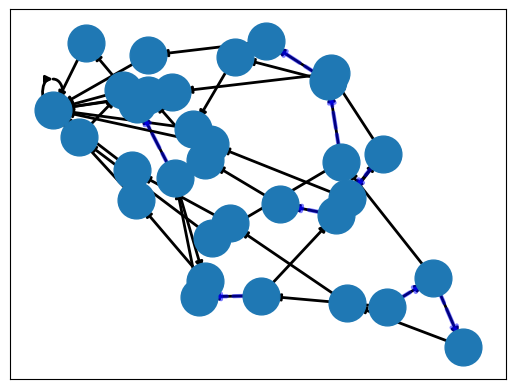

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

#G = nx.path_graph(5)
G = Global._planner_knowledge_graph.get_graph()

pos = nx.spring_layout(G)

plt.ion()  # enable interactive mode
fig, ax = plt.subplots()

#nx.draw_networkx_edges(G, pos, ax=ax)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 3]

# nodes
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=elarge, width=2)
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
)

plt.show()


In [33]:
import numpy as np
import altair as alt

G = Global._planner_knowledge_graph.get_graph()

# Create the planner graph using Altair Networkx library.

planner_graph = nxa.draw_networkx(
    G, 
    pos=pos,
    node_color='name',
    width='weight',
    node_size=400, #sizes,# * 20, #300,
    edge_color='black',
    node_tooltip=['node', 'name:N', 'application_count', 'application'],
).properties(width=600, height=600, title='Application Portfolio Management (APM) Planning Graph')

# Display the planner graph.

planner_graph.interactive()


alt.LayerChart(...)